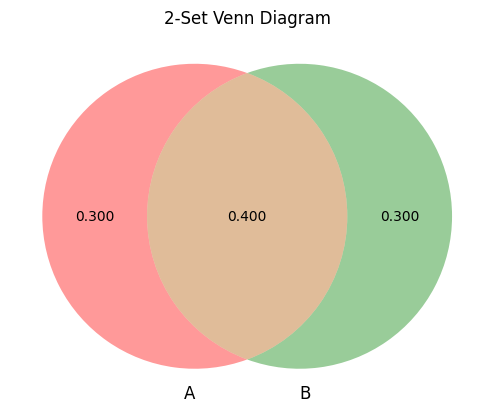

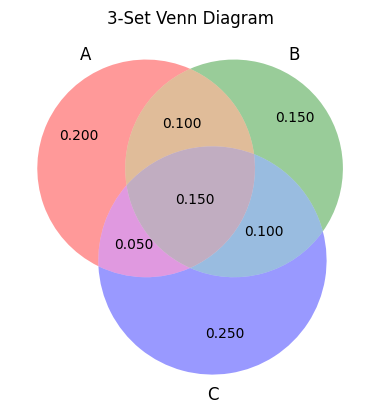

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

def plot_venn2(region_areas):
    """
    Plot a 2-set Venn diagram.
    
    Parameters:
      region_areas: tuple of three floats (A_only, B_only, A_and_B)
                    These should sum to <= 1 (assuming total area=1).
    """
    if len(region_areas) != 3:
        raise ValueError("For 2 sets, you must provide 3 numbers: (A_only, B_only, A_and_B)")
    
    A_only, B_only, A_and_B = region_areas
    total = A_only + B_only + A_and_B
    if abs(total - 1) > 1e-6:
        print(f"Warning: The provided areas sum to {total:.3f}, not 1.")
    
    # Create the Venn diagram
    venn = venn2(subsets=(A_only, B_only, A_and_B), set_labels=('A', 'B'))
    
    # Annotate each region with the area value
    if venn.get_label_by_id('10'):
        venn.get_label_by_id('10').set_text(f"{A_only:.3f}")
    if venn.get_label_by_id('01'):
        venn.get_label_by_id('01').set_text(f"{B_only:.3f}")
    if venn.get_label_by_id('11'):
        venn.get_label_by_id('11').set_text(f"{A_and_B:.3f}")
    
    plt.title("2-Set Venn Diagram")
    plt.show()

def plot_venn3(region_areas):
    """
    Plot a 3-set Venn diagram.
    
    Parameters:
      region_areas: tuple of 7 floats corresponding to regions:
          (only A, only B, A∩B only, only C, A∩C only, B∩C only, A∩B∩C)
      Order is interpreted as:
          - '100': only A
          - '010': only B
          - '110': A∩B (without C)
          - '001': only C
          - '101': A∩C (without B)
          - '011': B∩C (without A)
          - '111': A∩B∩C
      These should sum to 1.
    """
    if len(region_areas) != 7:
        raise ValueError("For 3 sets, you must provide 7 numbers: (A_only, B_only, A∩B_only, C_only, A∩C_only, B∩C_only, A∩B∩C)")
    
    regions = {
        '100': region_areas[0],
        '010': region_areas[1],
        '110': region_areas[2],
        '001': region_areas[3],
        '101': region_areas[4],
        '011': region_areas[5],
        '111': region_areas[6]
    }
    
    total = sum(region_areas)
    if abs(total - 1) > 1e-6:
        print(f"Warning: The provided areas sum to {total:.3f}, not 1.")
    
    # Create the Venn diagram
    venn = venn3(subsets=(regions['100'], regions['010'], regions['110'],
                           regions['001'], regions['101'], regions['011'],
                           regions['111']),
                 set_labels=('A', 'B', 'C'))
    
    # Annotate each region with its area value
    for region_id, area in regions.items():
        label = venn.get_label_by_id(region_id)
        if label:
            label.set_text(f"{area:.3f}")
    
    plt.title("3-Set Venn Diagram")
    plt.show()


# Example usage:

# For a 2-set Venn diagram, suppose we want:
#  - A_only: 0.3, B_only: 0.3, and overlap A∩B: 0.4 (total = 1)
venn2_areas = (0.3, 0.3, 0.4)
plot_venn2(venn2_areas)

# For a 3-set Venn diagram, suppose we want:
#  - only A: 0.2, only B: 0.15, A∩B (no C): 0.1,
#  - only C: 0.25, A∩C (no B): 0.05, B∩C (no A): 0.1,
#  - A∩B∩C: 0.15 (total = 1)
venn3_areas = (0.2, 0.15, 0.1, 0.25, 0.05, 0.1, 0.15)
plot_venn3(venn3_areas)


Total area of circle A: 0.83
Total area of circle B: 0.83
Total area of circle C: 0.83
Total area of circles: 2.50


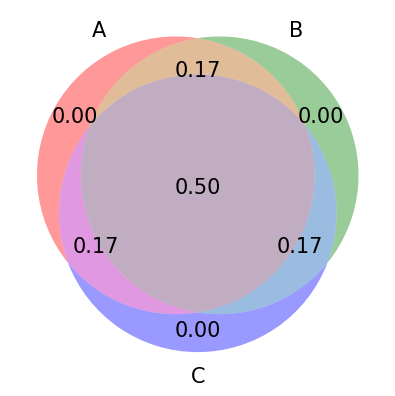

In [28]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def plot_custom_venn3(X, font_size=16):
    """
    Plots a 3-set Venn diagram given a parameter X (0 < X < 1) such that:
      - Triple overlap (A ∩ B ∩ C) = X/2
      - Each pairwise-only overlap = X/6
      - Unique region in each circle = (1 - X) / 3
      
    Also prints the total area of each circle, and uses a larger font size.
    
    Parameters:
      X : float
          A number between 0 and 1 representing the total overlapping portion.
      font_size : int, optional
          Font size for the labels and title. Default is 16.
    """
    if not (0 <= X <= 1):
        raise ValueError("X must be between 0 and 1 (exclusive).")

    # Define regions for the venn diagram:
    # Unique regions (only in A, only in B, only in C):
    only_A = (1 - X) / 3
    only_B = (1 - X) / 3
    only_C = (1 - X) / 3

    # Pairwise overlaps (excluding the triple overlap)
    AB_only = X / 6
    AC_only = X / 6
    BC_only = X / 6

    # Triple overlap (A ∩ B ∩ C)
    ABC = X / 2

    # Compute the total area for each circle:
    # Each circle's area = unique region + both pairwise overlaps + triple overlap
    circle_area = (1 - X) / 3 + (X / 6 + X / 6) + (X / 2)
    
    print(f"Total area of circle A: {circle_area:.2f}")
    print(f"Total area of circle B: {circle_area:.2f}")
    print(f"Total area of circle C: {circle_area:.2f}")
    print(f"Total area of circles: {3 * circle_area:.2f}")

    # Create the Venn diagram.
    # The subsets order for venn3 is:
    # (only A, only B, A∩B only, only C, A∩C only, B∩C only, A∩B∩C)
    subsets = (only_A, only_B, AB_only, only_C, AC_only, BC_only, ABC)
    v = venn3(subsets=subsets, set_labels=('A', 'B', 'C'))

    # Set font sizes for the set labels:
    for text in v.set_labels:
        if text:
            text.set_fontsize(font_size)

    # Update the region labels with larger font sizes:
    label_mapping = {
        '100': only_A,  # Only A
        '010': only_B,  # Only B
        '001': only_C,  # Only C
        '110': AB_only, # A∩B only
        '101': AC_only, # A∩C only
        '011': BC_only, # B∩C only
        '111': ABC      # A∩B∩C
    }

    for region, value in label_mapping.items():
        label = v.get_label_by_id(region)
        if label:
            label.set_text(f"{value:.2f}")
            label.set_fontsize(font_size)

    # Set title with larger font size
    # plt.title("3-Set Venn Diagram (Total Area = 1)", fontsize=font_size + 2)
    plt.show()

# Example usage:
if __name__ == '__main__':
    # Change X here to any value between 0 and 1.
    X = 1
    plot_custom_venn3(X, font_size=15)
